## Line integrals using sympy

Goal: Automated evaluation of line integral
$$ \int_{{\bf r}_1}^{{\bf r}_2} {\bf v}({\bf r})\cdot d{\bf l}  $$
given 
- a vector field ${\bf v}({\bf r}),$ and 
- a path ${\bf l}$ parametrized in terms
of a variable $t$ that runs from 0 to 1, i.e., ${\bf l} = {\bf l}(t)$, and ${\bf l}(0) = 
{\bf r}_1,$ and ${\bf l}(1) = {\bf r}_2$.

So far works for paths parametrized in terms of Cartesian basis vectors.  Will need an additional function to convert paths parametrized in terms of $r$, $\theta$, $\phi$ into 
paths in terms of $x$, $y$, and $z$.

In [1]:
import sympy as sym
sym.init_printing()         # for LaTeX formatted output
import sympy.vector as sv   # There is a very similar sympy.physics.vector module
                            # I think the "physics" version may be more 
                            # transformation-friendly

In [2]:
x, y, z, t = sym.symbols('x,y,z,t') 

In [3]:
R= sv.CoordSys3D('R')  # cf ReferenceFrame of sympy.physics.vector

#### Define vector field as a funtion of $x$, $y$, and $z$:

In [4]:
def v(x,y,z):   # vector field as a function of scalar variables x,y,z
     return x*y*R.i + 2*y*z*R.j + 3*x*z*R.k

 ####  Express vector field on path ${\bf l}$ as a function of parameter $t$:

In [5]:
def voft(l):     # vector field along path l as a function of t
    x,y,z = (l.dot(R.i),l.dot(R.j),l.dot(R.k)) # x,y,z as functions of t
    return v(x,y,z)
    

- Calculate $d{\bf l}/dt$:<br>
(I label this `dl`; the `dt` will be implicit in the `integrate` step.) 
- Take dot product with ${\bf v}$ along the path
- Integrate from $t=0$ to $t=1$.

In [6]:
def li(l,v):    # dl/dt
    dl = sym.diff(l,t)
    return sym.integrate(voft(l).dot(dl),(t,0,1))

#### Parametrize path; $t:0\longrightarrow 1$

These are paths from Griffiths problem 1.34.

In [7]:
l1 = 2*t*R.j
l2 = 2*(1-t)*R.j + 2*t*R.k
l3 = 2*(1-t)*R.k

#### Results

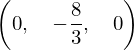

In [8]:
li(l1,v),li(l2,v),li(l3,v)

#### Examine intermediate results

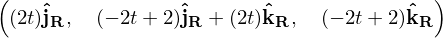

In [9]:
l1,l2,l3

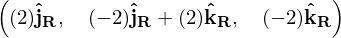

In [10]:
dl1 = sym.diff(l1,t)
dl2 = sym.diff(l2,t)
dl3 = sym.diff(l3,t)
dl1,dl2,dl3

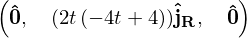

In [11]:
voft(l1),voft(l2),voft(l3)

In [12]:
voft(l1).dot(l1),voft(l2).dot(l2),voft(l3).dot(l3)

In [13]:
sym.integrate(voft(l2).dot(dl2),(t,0,1))

### Check that line integral around closed path is equal to the surface integral of the curl.

In [14]:
curl_v = sv.curl(v(R.x,R.y,R.z)).subs(R.x,0)  # curl evaluated on surface where x=0
da = R.i   # Infinitesimals dx dy implicit in integrate

In [15]:
sym.integrate(curl_v.dot(da),(R.z,0,2-R.y),(R.y,0,2))

### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on linuxremotes), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [16]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [17]:
%version_information scipy, matplotlib, sympy

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
sympy 1.1
Tue Aug 01 14:26:18 2017 EDT